## Is the Mushroom Poisonous?
Imagine you are a data scientist working for the biology department at your local university. Your colleague who is a mycologist (a biologist who specializes in fungi) has requested that you help her develop a machine learning model capable of discerning whether a particular mushroom species is poisonous or not given attributes relating to its appearance.

The objective of this activity is to employ the grid and randomized search strategies to find an optimal model for this purpose.

In [1]:
import pandas as pd
mushrooms = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops'\
                        '/The-Data-Science-Workshop/master/Chapter08/Dataset'\
                        '/agaricus-lepiota.data', header=None)

In [3]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8124 non-null   object
 1   1       8124 non-null   object
 2   2       8124 non-null   object
 3   3       8124 non-null   object
 4   4       8124 non-null   object
 5   5       8124 non-null   object
 6   6       8124 non-null   object
 7   7       8124 non-null   object
 8   8       8124 non-null   object
 9   9       8124 non-null   object
 10  10      8124 non-null   object
 11  11      8124 non-null   object
 12  12      8124 non-null   object
 13  13      8124 non-null   object
 14  14      8124 non-null   object
 15  15      8124 non-null   object
 16  16      8124 non-null   object
 17  17      8124 non-null   object
 18  18      8124 non-null   object
 19  19      8124 non-null   object
 20  20      8124 non-null   object
 21  21      8124 non-null   object
 22  22      8124 non-null   

In [30]:
y_raw = mushrooms.iloc[:,0] # first column
X_raw = mushrooms.iloc[:,1:]
print(y.shape)
print(X.shape)

(8124,)
(8124, 22)


In [31]:
# recode y so that poisonous mushrooms are represented by 1 and edible mushrooms as 0
y = (y_raw == 'p') * 1

In [32]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: 0, Length: 8124, dtype: int64

In [33]:
# tranform feature set into numpy array with binary representation; one-hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(X_raw)
X = encoder.transform(X_raw).toarray()

In [36]:
max_features= X.shape[1]

### Random Forest Classifier with Randomized Search

In [54]:
# # Grid Search
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=100)
grid = {'criterion': ['gini', 'entropy'],
             'max_features': [2, 4, 6, 8, 10, 12, 14]}

from sklearn import model_selection
gscv = model_selection.GridSearchCV(estimator=rfc, param_grid=grid,
                                      scoring='accuracy', cv=5)
gscv.fit(X, y)
results = pd.DataFrame(gscv.cv_results_)
results.sort_values('rank_test_score', ascending=True).head(10)

# Random Search
from scipy import stats
max_features = X.shape[1]
param_dist = {'criterion': ['gini', 'entropy'],
             'max_features': stats.randint(low=1, high=max_features)}

rscv = model_selection.RandomizedSearchCV(estimator=rfc,
                                         param_distributions=param_dist,
                                         n_iter=50, cv=5, scoring='accuracy',
                                         random_state=100)
rscv.fit(X, y)
results = pd.DataFrame(rscv.cv_results_)
results.sort_values('rank_test_score', ascending=True).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.941823,0.109003,0.014981,0.001443,gini,99,"{'criterion': 'gini', 'max_features': 99}",1.000000,1.0,0.996308,1.0,0.745074,0.948276,0.101611,1
25,1.001626,0.120723,0.013692,0.001332,gini,106,"{'criterion': 'gini', 'max_features': 106}",1.000000,1.0,0.996308,1.0,0.745074,0.948276,0.101611,1
29,1.046782,0.143364,0.014730,0.001486,gini,111,"{'criterion': 'gini', 'max_features': 111}",1.000000,1.0,0.995692,1.0,0.739532,0.947045,0.103770,3
41,1.003578,0.121159,0.013658,0.001095,gini,105,"{'criterion': 'gini', 'max_features': 105}",1.000000,1.0,0.996308,1.0,0.737685,0.946798,0.104567,4
10,1.019989,0.135258,0.013787,0.000856,gini,108,"{'criterion': 'gini', 'max_features': 108}",1.000000,1.0,0.996308,1.0,0.737685,0.946798,0.104567,4
18,0.222884,0.005607,0.016287,0.001026,gini,5,"{'criterion': 'gini', 'max_features': 5}",0.842462,1.0,1.000000,1.0,0.862685,0.941029,0.072507,6
15,0.226488,0.004068,0.015621,0.000306,gini,5,"{'criterion': 'gini', 'max_features': 5}",0.842462,1.0,1.000000,1.0,0.862685,0.941029,0.072507,6
46,1.026831,0.143415,0.013759,0.000370,gini,107,"{'criterion': 'gini', 'max_features': 107}",1.000000,1.0,0.996308,1.0,0.708128,0.940887,0.116388,8
49,0.260122,0.008553,0.014541,0.000464,entropy,11,"{'criterion': 'entropy', 'max_features': 11}",0.842462,1.0,1.000000,1.0,0.860837,0.940660,0.072909,9
39,0.314047,0.013898,0.014008,0.000376,gini,18,"{'criterion': 'gini', 'max_features': 18}",0.842462,1.0,1.000000,1.0,0.841749,0.936842,0.077353,10


<AxesSubplot:ylabel='params'>

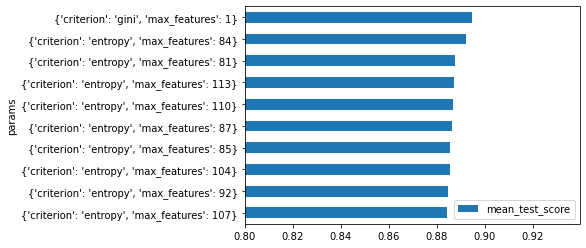

In [57]:
results.loc[:,'params'] = results.loc[:,'params'].astype(str)
(results.sort_values('rank_test_score', ascending=False)
        .loc[:,['params', 'mean_test_score']]
        .drop_duplicates().head(10)
        .plot.barh(x='params', xlim=(0.8)))

In [38]:
# setting up the random search sampling 50 times and conducting 5-fold cross-validation
from sklearn import model_selection
rscv = model_selection.RandomizedSearchCV(estimator=rfc,
                                         param_distributions=param_dist,
                                         n_iter=50, cv=5, scoring='accuracy',
                                         random_state=100)

In [39]:
# start the process
rscv.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faf09b63430>},
                   random_state=100, scoring='accuracy')

In [45]:
# mean_test_score for top 10 models
import pandas as pd
# convert the dictionary of results to a pandas dataframe
results = pd.DataFrame(rscv.cv_results_)

# removing duplication
distinct_results = results.loc[:,['params', 'mean_test_score']]

# convert the params dictionaries to string data types
distinct_results.loc[:,'params'] = distinct_results.loc[:,'params'].astype('str')

# remove duplicates
distinct_results.drop_duplicates(inplace=True)

# look at top 10 best hyperparameterizations
distinct_results.sort_values('mean_test_score', ascending=False).head(10)

,params,mean_test_score
25,"{'criterion': 'gini', 'max_features': 106}",0.948276
6,"{'criterion': 'gini', 'max_features': 99}",0.948276
29,"{'criterion': 'gini', 'max_features': 111}",0.947045
10,"{'criterion': 'gini', 'max_features': 108}",0.946798
41,"{'criterion': 'gini', 'max_features': 105}",0.946798
15,"{'criterion': 'gini', 'max_features': 5}",0.941029
46,"{'criterion': 'gini', 'max_features': 107}",0.940887
49,"{'criterion': 'entropy', 'max_features': 11}",0.940660
39,"{'criterion': 'gini', 'max_features': 18}",0.936842
27,"{'criterion': 'gini', 'max_features': 64}",0.935232


Plot the mean test score versus hyperparameterization for the top 10 models found using random search.

<AxesSubplot:ylabel='params'>

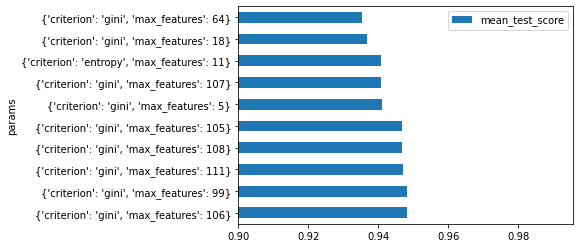

In [50]:
# visualize top performing models
#distinct_results.sort_values('mean_test_score', ascending=False).head(10)
distinct_results.sort_values('mean_test_score', ascending=False).head(10).plot.barh(x='params', xlim=(0.9))

#distinct_results[distinct_results.mean_test_score > 0.93].sort_values(
#'mean_test_score').plot.barh(x='params', xlim=(0.9))

### Random Forest Classifier with Grid Search

In [40]:
grid = {'criterion': ['gini', 'entropy'],
             'max_features': [2, 4, 6, 8, 10, 12, 14]}

In [42]:
# setting up grid search to score on accuracy and evaluate over 5-fold cross-validation
from sklearn import model_selection
gscv = model_selection.GridSearchCV(estimator=rfc, param_grid=param_dist,
                                      scoring='accuracy', cv=5)

In [43]:
gscv.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [2, 4, 6, 8, 10, 12, 14]},
             scoring='accuracy')